In [1]:
%matplotlib inline  

import os
import re
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json
from result_parser import get_exp_result

fig_width = 10
plt.rcParams["figure.figsize"] = (fig_width, 6)
plt.rcParams['font.size'] = 22

data_distr_file = 'zipf_dict_users.pkl'
result_folder = 'cossim_zipf'

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-imehokce because the default path (/home/yhyeh/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.



=== cifar100 - cossim_zipf - shard10 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [15.92, 15.14, 15.37] -> max: 15.92
target_acc: 12.41760, 78% of bacc 

required epoch
[452.0, 321.0, 273.0]
['1.00x', '1.41x', '1.66x']
required time_simu
[3127.0, 2078.0, 1804.0]
['1.00x', '1.50x', '1.73x']

=== cifar100 - cossim_zipf - shard10 - select100*0.05 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [13.81, 13.96, 13.6] -> max: 13.96
target_acc: 10.88880, 78% of bacc 

required epoch
[445.0, 283.0, 252.0]
['1.00x', '1.57x', '1.77x']
required time_simu
[2601.0, 1590.0, 1387.0]
['1.00x', '1.64x', '1.88x']

=== cifar100 - cossim_zipf - shard2 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [9.89, 11.22, 11.99] -> max: 11.99
target_acc: 9.35220, 78% of bacc 

required epoch
[925.0, 414.0, 350.0]
['1.00x', '2.23x', '2.64x']
required time_simu
[6187.0, 2897.0, 2450.0]
['

/home/yhyeh/LG-FedAvg/result_parser.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 6))


required time_simu
[3372.0, 1156.0, 1156.0]
['1.00x', '2.92x', '2.92x']

=== cifar10 - cossim_zipf - shard2 - select100*0.05 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [42.71, 53.75, 53.84] -> max: 53.84
target_acc: 41.99520, 78% of bacc 

required epoch
[805.0, 105.0, 105.0]
['1.00x', '7.67x', '7.67x']
required time_simu
[4711.0, 573.0, 573.0]
['1.00x', '8.22x', '8.22x']


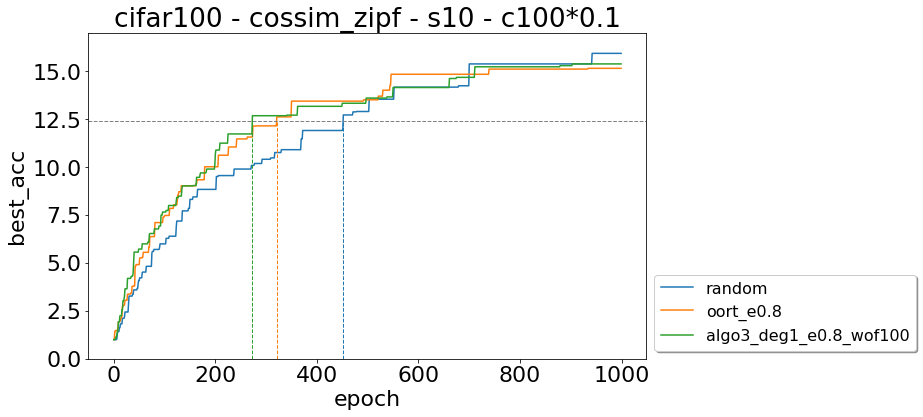

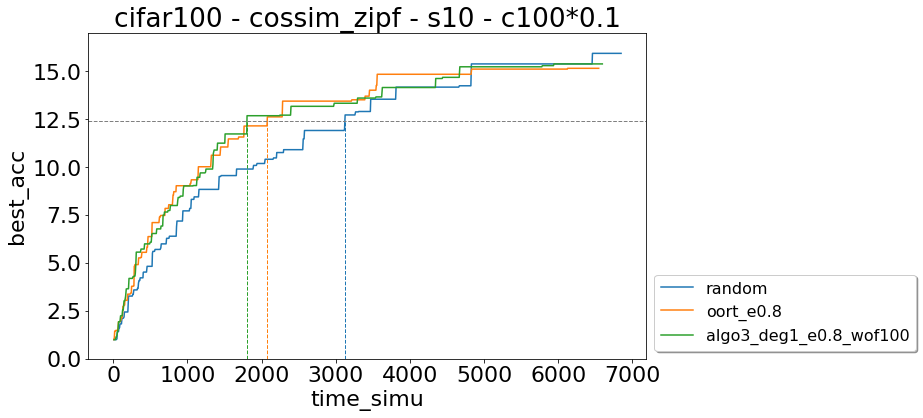

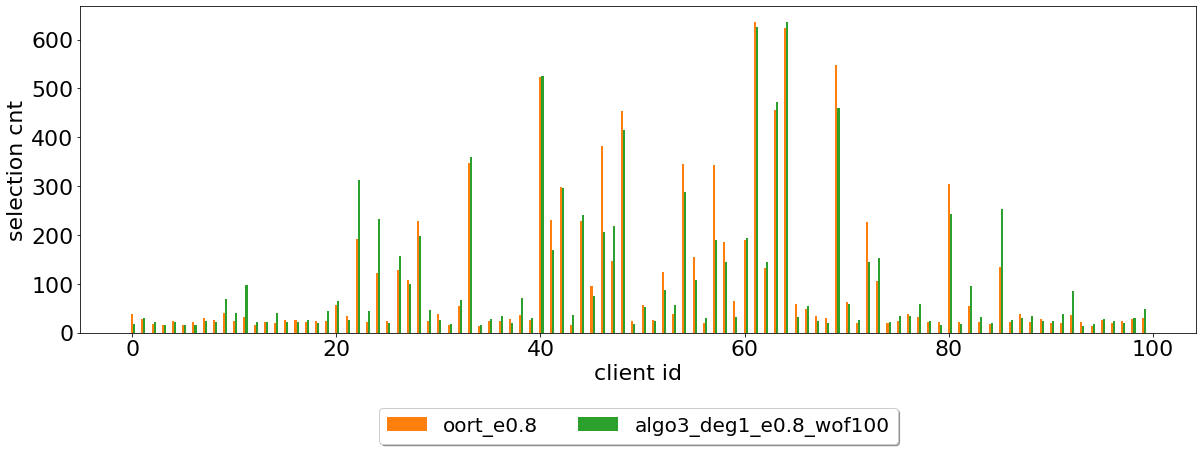

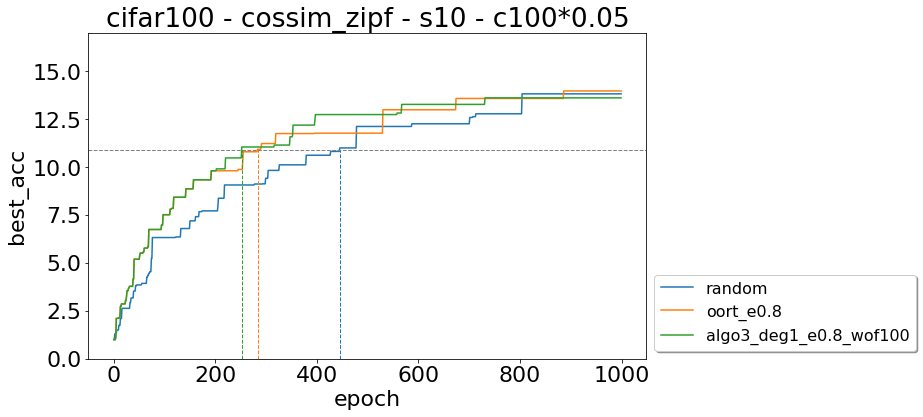

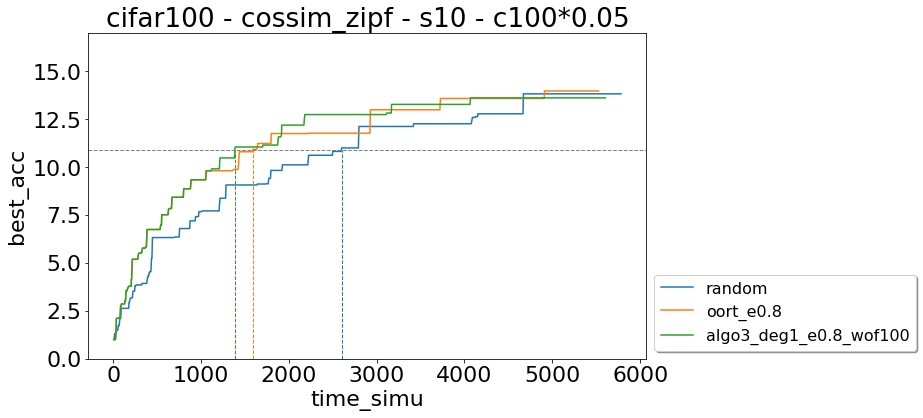

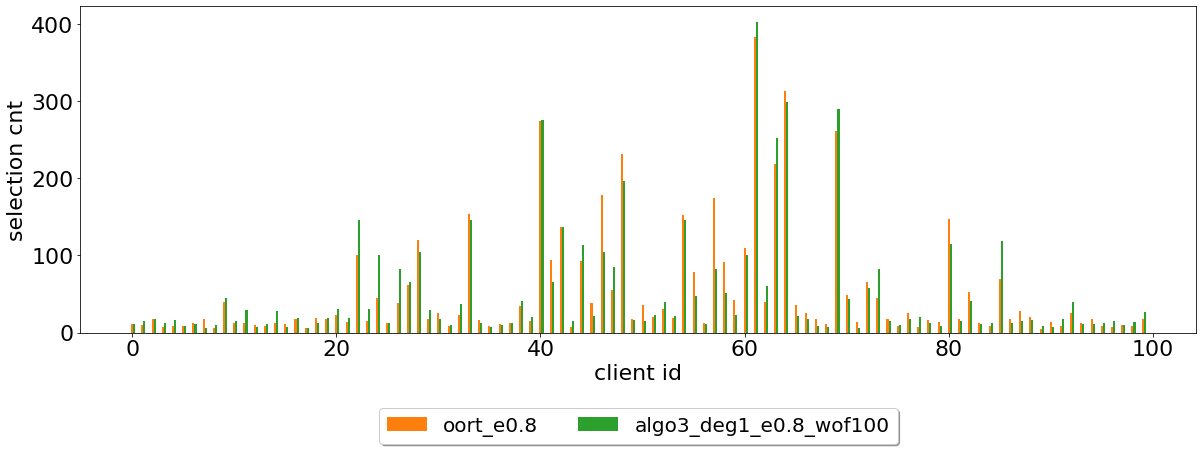

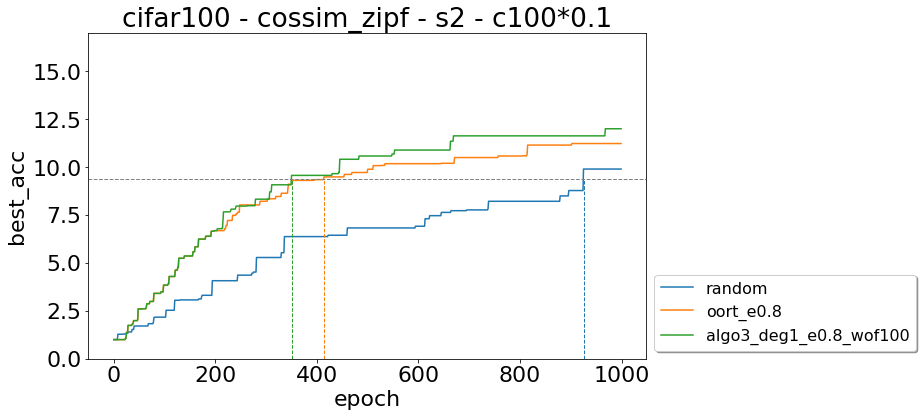

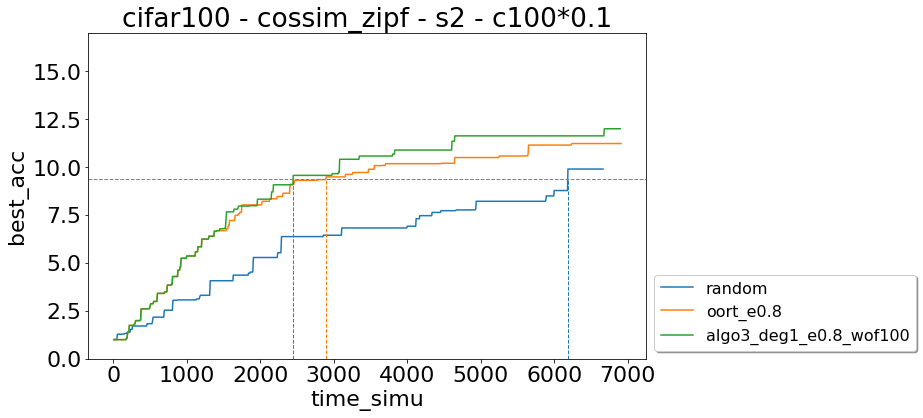

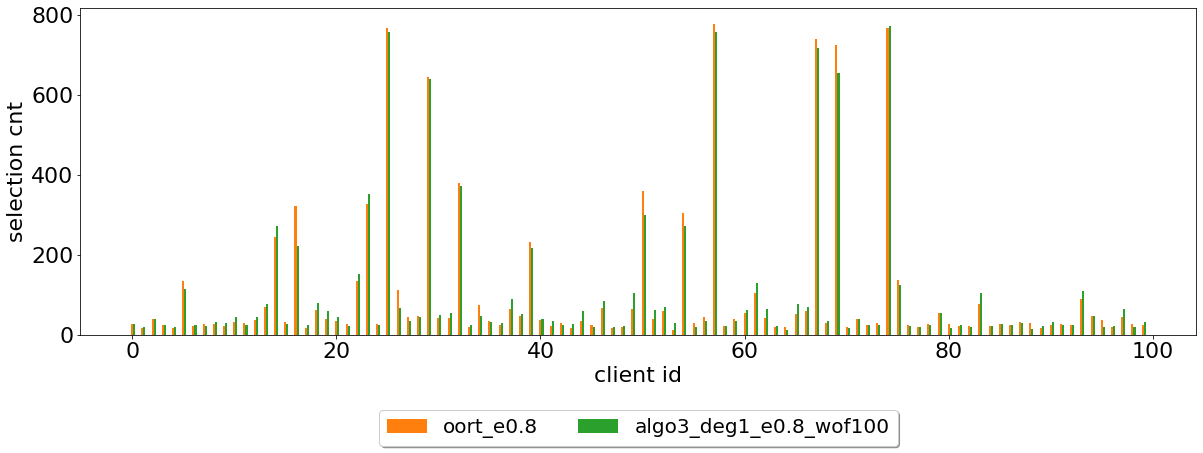

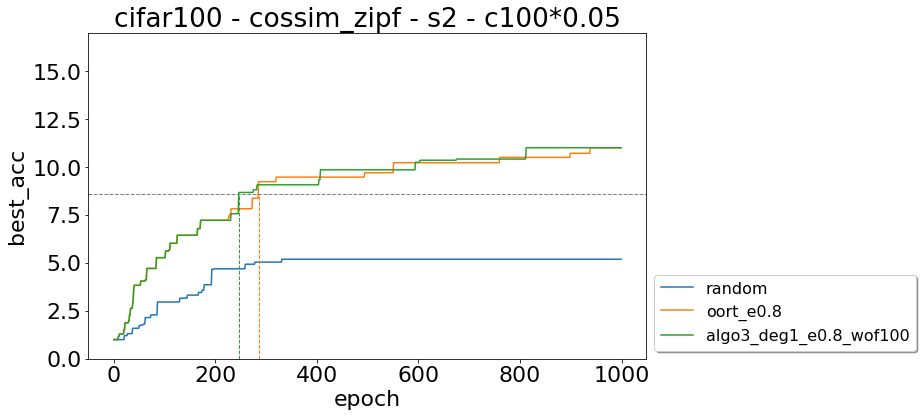

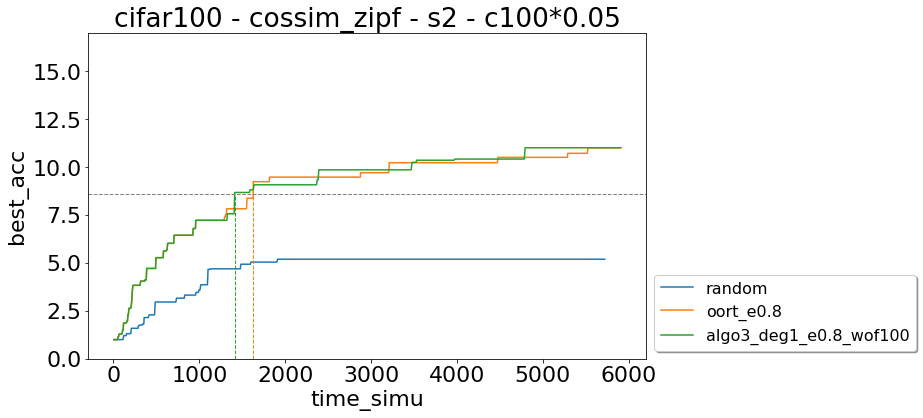

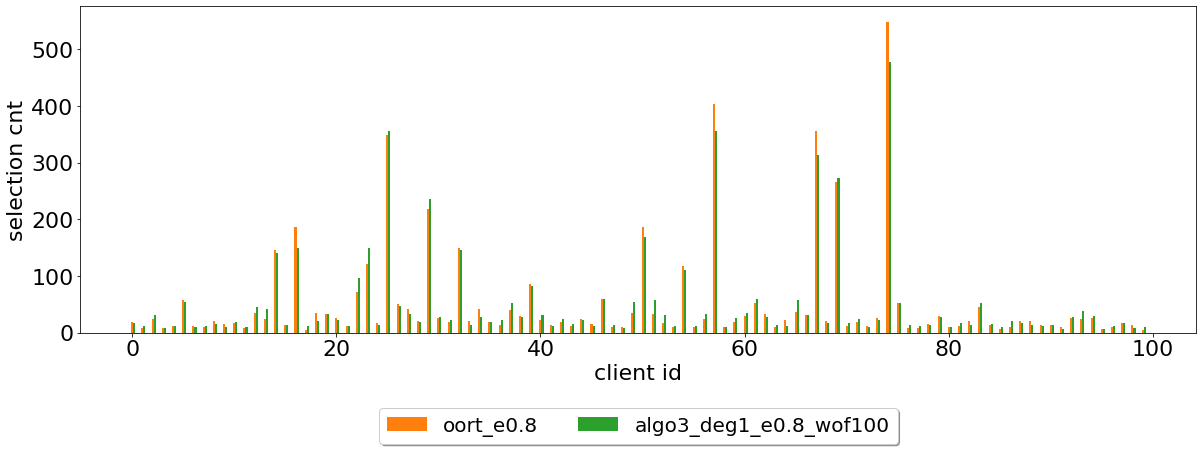

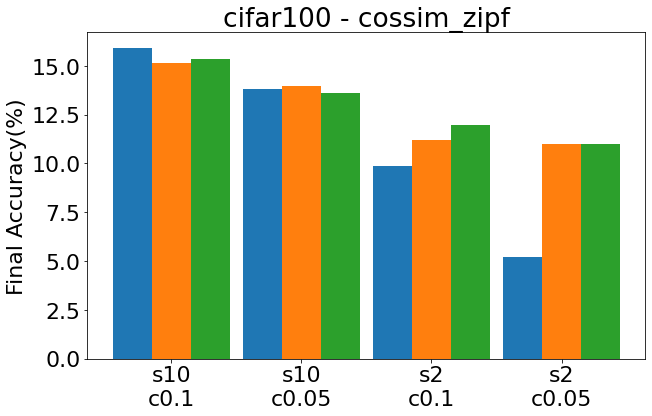

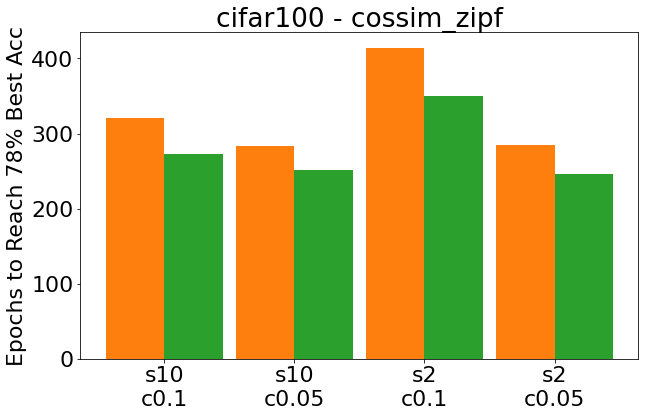

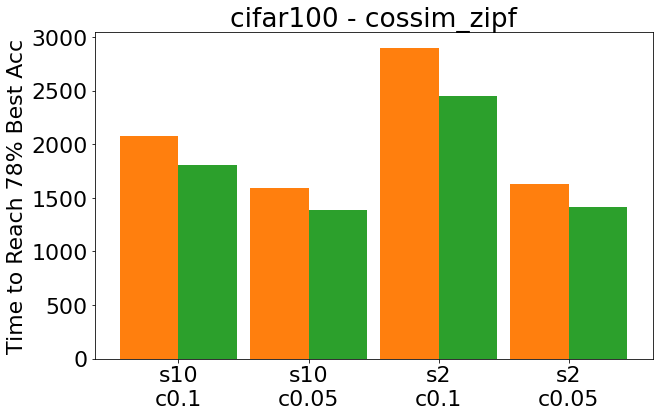

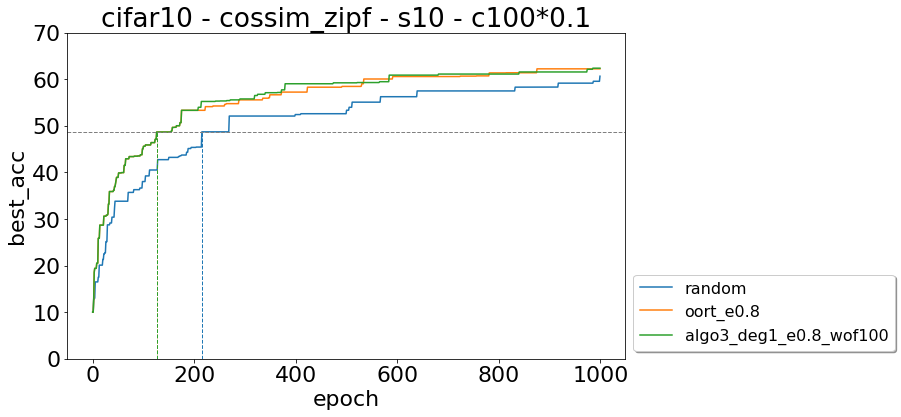

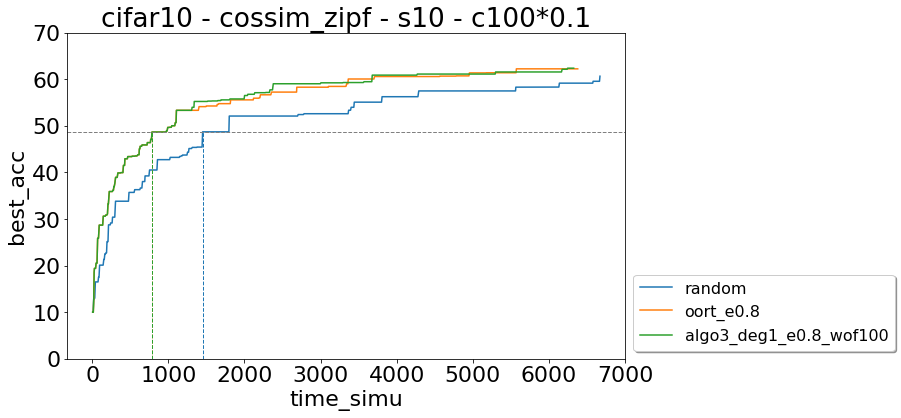

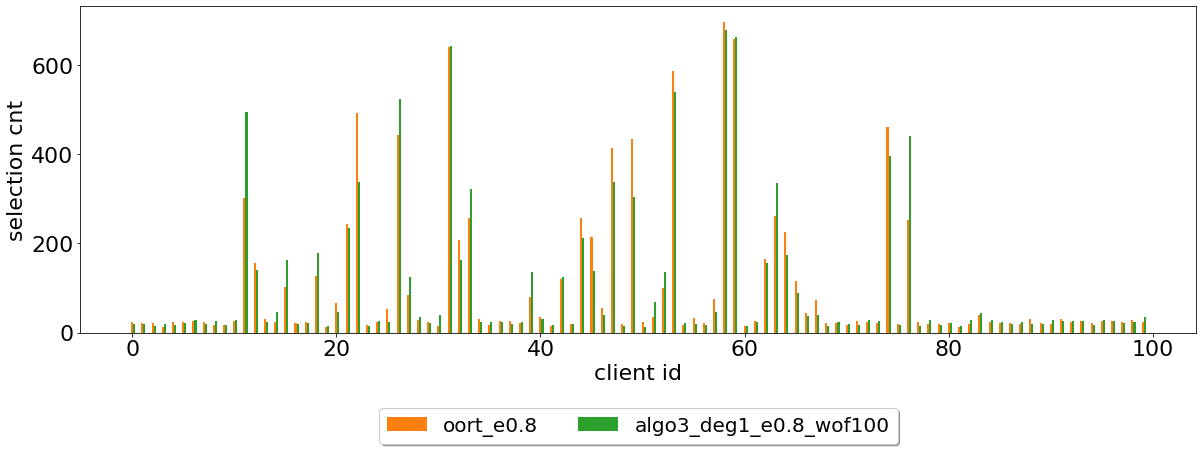

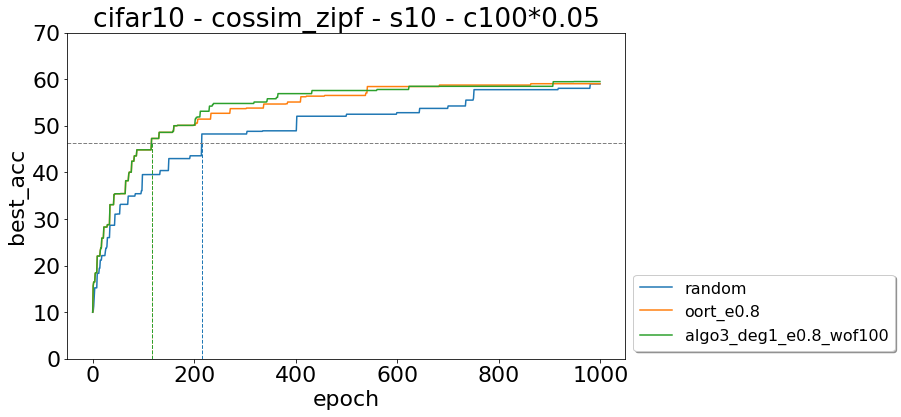

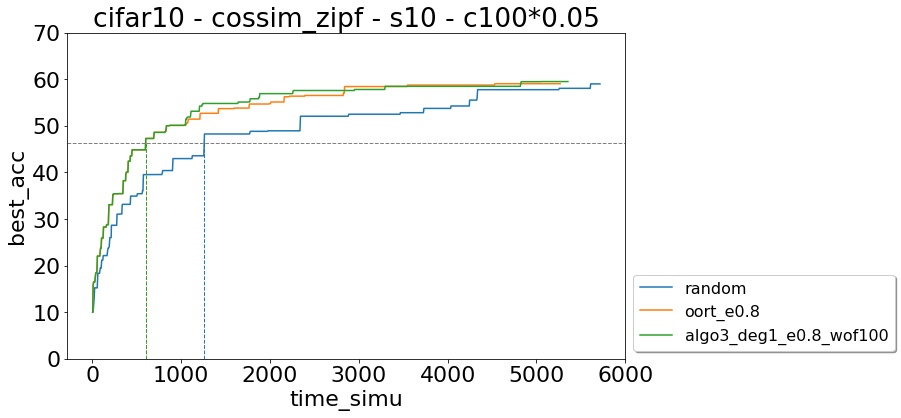

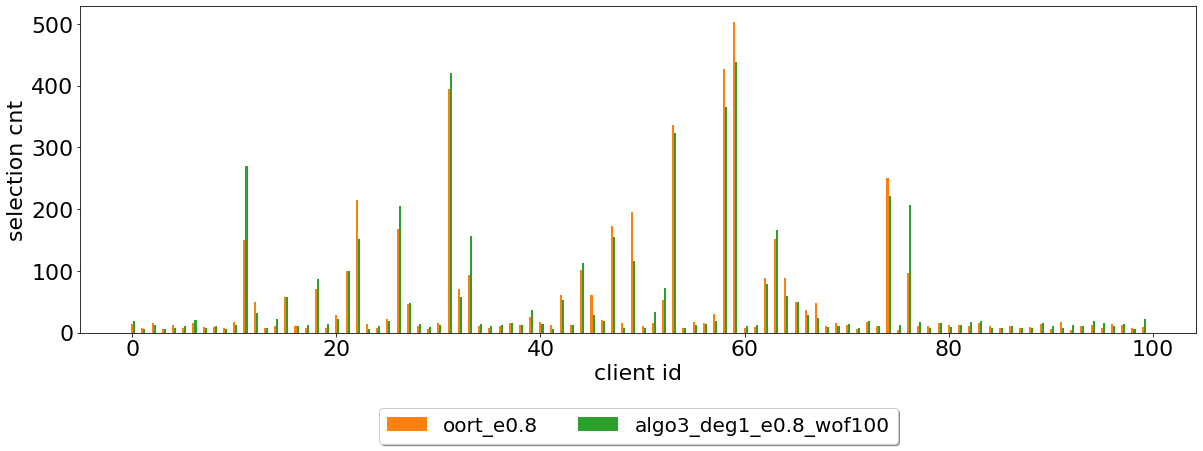

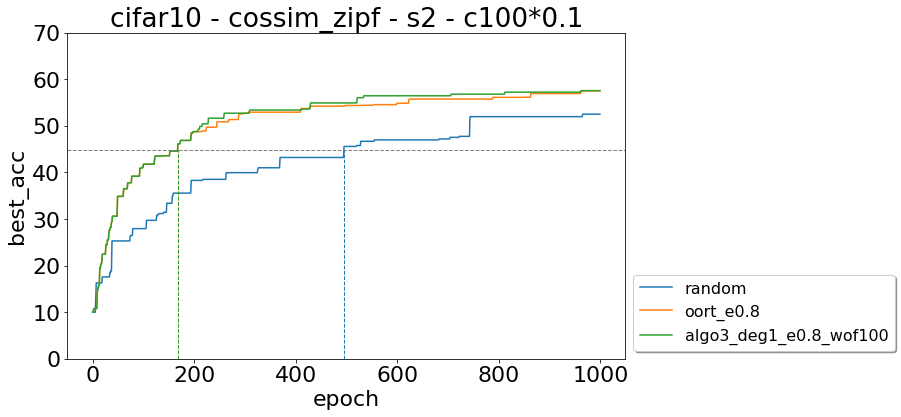

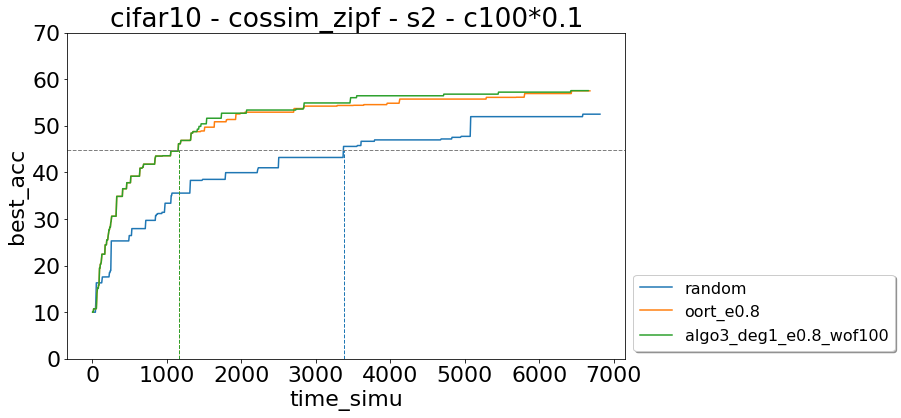

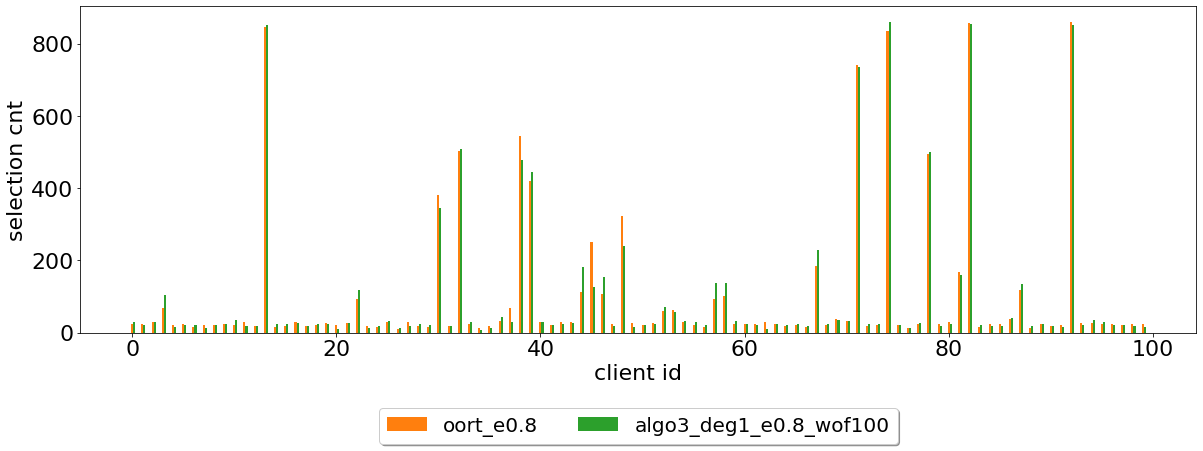

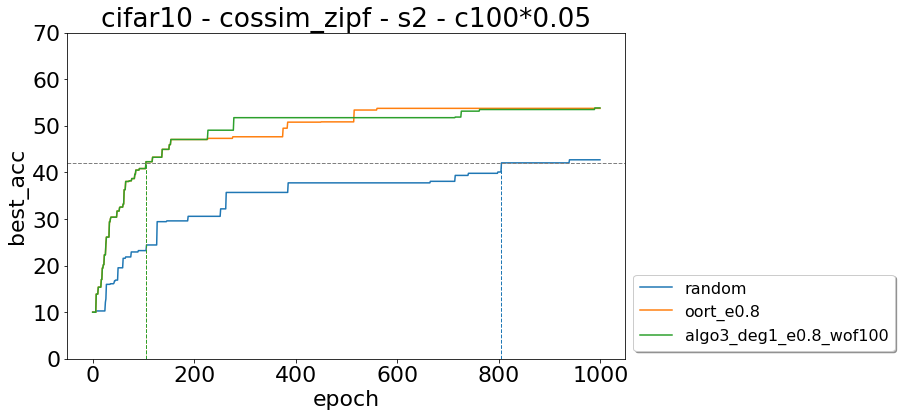

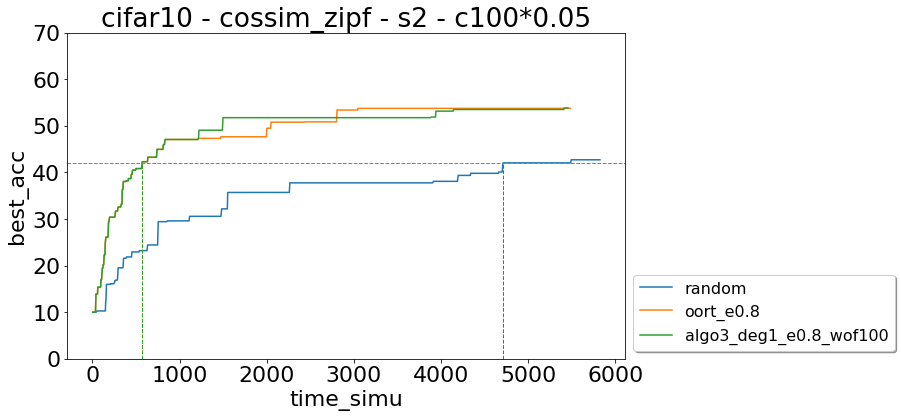

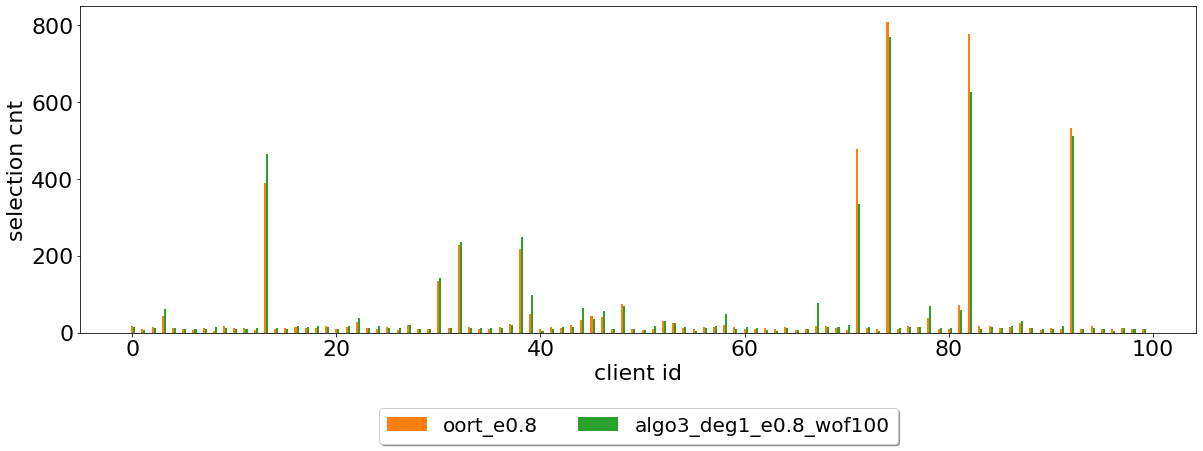

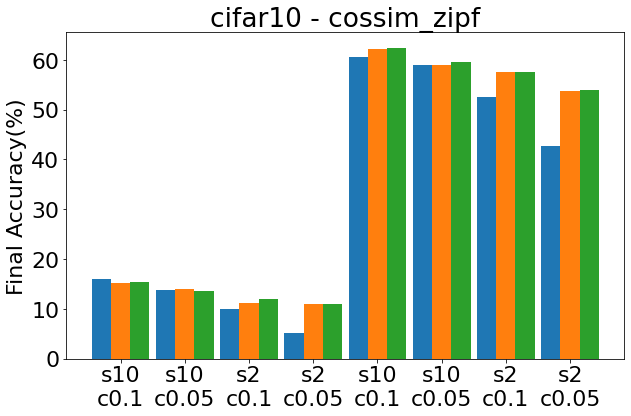

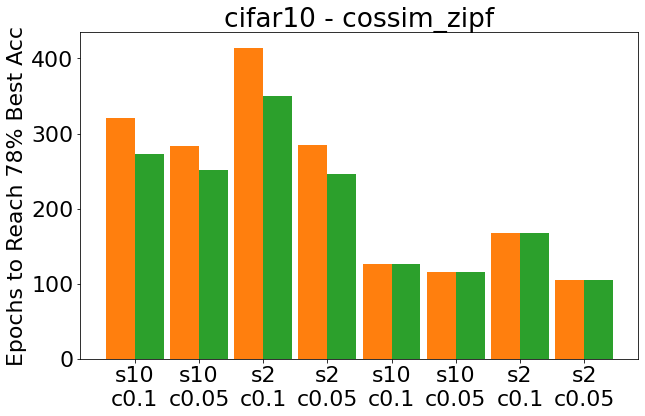

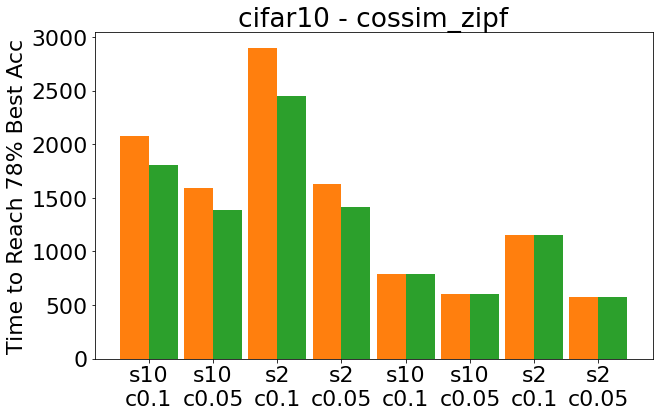

In [9]:
# compare over datasets
acc_threshold = 78

metrics = {'ACC':[], 'TTA_epoch':[], 'TTA_time':[]}
x_labels = []
y_labels = ['Final Accuracy(%)',
            'Epochs to Reach {}% Best Acc'.format(acc_threshold),
            'Time to Reach {}% Best Acc'.format(acc_threshold)]

for dataset in ['cifar100', 'cifar10']:
    for shard_per_user in [10, 2]:
        for frac in [0.1, 0.05]:
            x_labels.append('s{}\nc{}'.format(shard_per_user, frac))
            algos, color_algos, bacc_algos, required_time = get_exp_result(
                dataset, data_distr_file, result_folder, 
                shard_per_user, frac, acc_threshold)

            metrics['ACC'].append(bacc_algos)
            metrics['TTA_epoch'].append(required_time['epoch'])
            metrics['TTA_time'].append(required_time['time_simu'])
    
    
    # summary 
    x = np.arange(len(x_labels))
    for i, (k, v) in enumerate(metrics.items()):
        plt.figure(figsize=(10, 6))
        plt.title('{} - {}'.format(dataset, result_folder))
        cur_algos = algos
        cur_v_T = v_T = np.array(v).T
        if 'TTA' in k:
            cur_algos = algos[1:]
            cur_v_T = v_T[1:]
        for aidx, algo in enumerate(cur_algos):
            w = 0.9/len(cur_algos)
            if k == 'ACC':
                p = plt.bar(x+aidx*w-0.45+w/2, cur_v_T[aidx], label=algo, width=w)
            else:
                p = plt.bar(x+aidx*w-0.45+w/2, cur_v_T[aidx], label=algo, 
                            width=w, color=color_algos[aidx+1])

        plt.ylabel(y_labels[i])
        plt.xticks(x, x_labels)#, rotation='vertical')
        '''plt.legend(fancybox=True, shadow=True, fontsize=16,
                              loc='lower left', bbox_to_anchor=(1, 0))'''